<a href="https://colab.research.google.com/github/sbutori/autoestudo-ccm10s06/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API de Predição de Imagens CIFAR-10 usando Servidor Flask

## Pré-requisitos


1. Fazer o upload do arquivo `cifar_net.pth`gerado para esse notebook após o treinamento com o dataset CIFAR (se não tiver esse arquivo, rode o notebook `train_model.ipynb`)
2. Fazer o upload do arquivo `model.py`para esse notebook
3. Criar uma conta em www.ngrok.com e obter o token de autenticação


In [1]:
!pip install flask
!pip install pyngrok

In [2]:
import getpass
import os
import threading

from flask import Flask, request, jsonify
from pyngrok import ngrok, conf
from model import predict_image
from PIL import Image
import io

## Fazer o login no ngrok.com com seu Token de Autenticação

In [ ]:
print("Insira seu authtoken, que pode ser copiado de https://dashboard.ngrok.com/get-started/your-authtoken")
conf.get_default().auth_token = getpass.getpass()

## Instruções do request

Faça uma requisição 'POST' com uma imagem do dataset CIFAR-10 no Body. Use seu cliente favorito, como Insomnia (veja o exemplo abaixo).

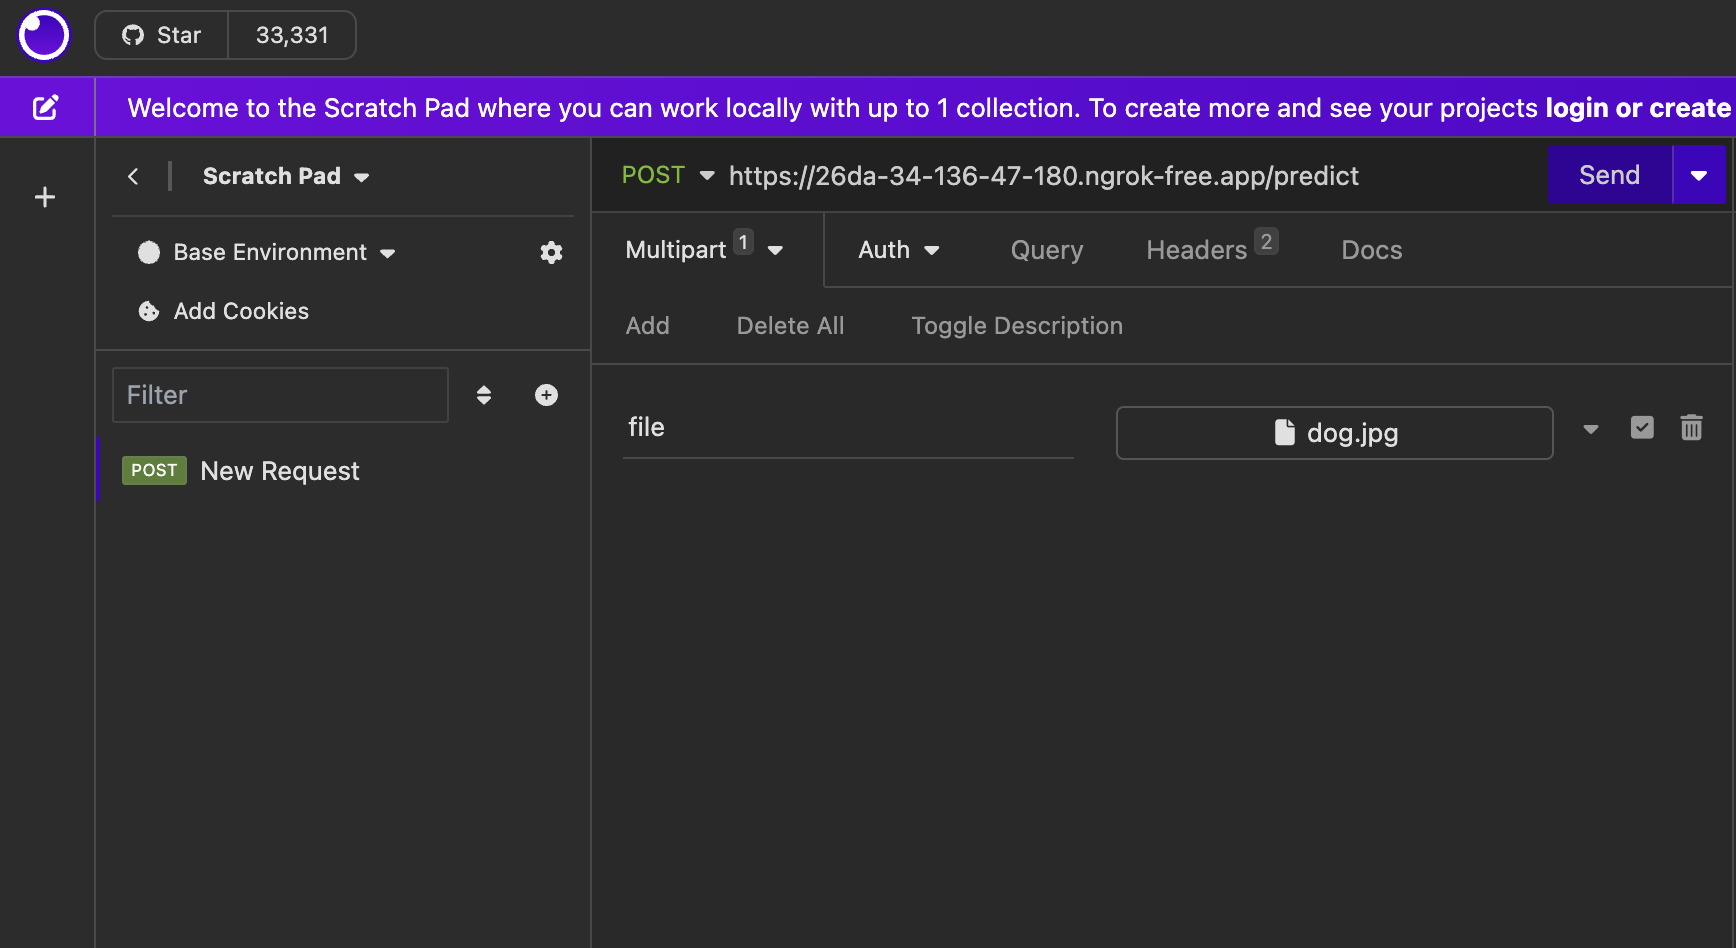

In [ ]:
app = Flask(__name__)

# Abra um tunel ngrok para o servidor HTTP
public_url = ngrok.connect(5000).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}/\"".format(public_url, 5000))

# Faça o update de URLs base para usar a URL pública gerada pelo ngrok
app.config["BASE_URL"] = public_url

# Flag de stop
stop_flag = threading.Event()

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify(error="No file provided"), 400
    file = request.files['file']
    img = Image.open(io.BytesIO(file.read()))
    prediction = predict_image(img)
    return jsonify(prediction=prediction)

# Inicie o servidor Flask em uma nova thread
flask_thread = threading.Thread(target=app.run, kwargs={"use_reloader": False})
flask_thread.start()

In [ ]:
# Se quiser parar o servidor, execute esse codigo
# stop_flag.set()
# ngrok.disconnect(public_url)
# flask_thread.join()